<h2>Kuala Lumpur Property Prices</h2>
Clean the Property Prices for Kuala Lumpur

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
# from tabulate import tabulate
import numpy as np
import pandas as pd
import re
from IPython import display
%matplotlib inline

# pd.options.display.max_columns = 500
# pd.options.display.max_rows = 500

# Use 3 decimal places in output display
# pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
# pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
# pd.set_option("display.max_rows", 250)

# tblt = lambda df:tabulate(df,headers='keys',tablefmt='psql')

df = pd.read_csv('./kl_property_data.csv')
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [34]:
df[df["Property Type"].isnull() == True]

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Seputeh, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"Ampang Hilir, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,"Bukit Jalil, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,"Mont Kiara, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,"Jalan Klang Lama (Old Klang Road), Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,"Jalan Kuching, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,"Taman Tun Dr Ismail, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,"Taman Tun Dr Ismail, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h4>Check the Shape of the Data Frame</h4>

In [35]:
df.shape

(53883, 8)

<h2>Location:</h2>
<h4>Clean the Locations Data</h4>
Clean the 'Kuala Lumpur' word, since all data belongs to the same city, also remove Capitalization inconsistencies

In [36]:
df['Location'] = df['Location'].str.lower() # convert all the cities to lower case 
df['Location'] = df['Location'].str.replace(r", kuala lumpur$", "") # remove ', kuala lumpur' from the area name
df['Location'].value_counts() # show unique values

mont kiara                           5897
klcc                                 5230
cheras                               4533
jalan klang lama (old klang road)    2854
setapak                              2710
                                     ... 
taman tar                               1
u-thant                                 1
sri kembangan                           1
taman yarl oug                          1
duta nusantara                          1
Name: Location, Length: 107, dtype: int64

<h2>Rooms:</h2>
<h4>Clean the Rooms</h4>
- split the '2+1' strings, convert to integers and add to get total area</br>
- also handle the words e.g. 'Studio'</br>
- also handle the 'Above' words</br>
- also Convert Rooms to integers

In [37]:
df.Rooms.value_counts() # check out the inconsistencies by getting unique values

3           14249
3+1          8070
2            5407
4            5018
4+1          4404
5+1          2340
1            2322
5            2065
2+1          1938
1+1          1191
6             937
Studio        874
6+1           807
4+2           479
3+2           477
5+2           410
7             358
7+1           237
2+2           132
8             125
6+             86
8+1            64
9              40
7+             32
10             25
9+1            14
8+             14
10+             8
1+2             8
12              8
20 Above        8
11              6
10+1            4
12+             4
13+             3
11+1            3
16              2
9+              2
14              2
13+1            1
18              1
13              1
15+             1
Name: Rooms, dtype: int64

In [38]:
def clean_trailing_plus(rooms):
    if rooms.endswith("+"):
        return int(rooms[:-1])         # remove the last character i.e. +
    if '+' in rooms:
        xx = rooms.split("+")          # split the string on '+' sign
        return int(xx[0]) + int(xx[1]) # add both sides of the string
    if 'Studio' in rooms:
        return 1                       # Studio flats are generally Single roomed
    if '20 Above' in rooms:
        return 20                      # assume 20 above is rated at 20 since the number is only 8 units, we can safely assume this
    else:
        return rooms                   # return the number of rooms if nothing above matches

df['Rooms']= df['Rooms'].astype(str).apply(clean_trailing_plus) # Apply cleaning operation

#Convert 'nan' in Rooms to 0 and convert Rooms to integer
df['Rooms'] = df['Rooms'].str.replace('nan', '0')
df['Rooms'] = pd.to_numeric(df['Rooms'])

print(df['Rooms'].value_counts())


3.0     14249
2.0      5407
4.0      5018
1.0      2322
5.0      2065
0.0      1706
6.0       937
7.0       358
8.0       125
9.0        40
10.0       25
12.0        8
11.0        6
16.0        2
14.0        2
18.0        1
13.0        1
Name: Rooms, dtype: int64


<h2>Car Parks:</h2>
<h4>Looks Okay</h4>
No Need Processing / Cleaning

In [39]:
df['Car Parks'].value_counts() # View Car Parks unique values

2.0     15314
1.0     13772
3.0      3838
4.0      1956
6.0       641
5.0       508
8.0        97
10.0       78
7.0        64
12.0        7
15.0        7
13.0        7
9.0         5
28.0        4
20.0        4
30.0        4
11.0        4
16.0        2
17.0        2
18.0        1
24.0        1
Name: Car Parks, dtype: int64

<h2>Bathrooms:</h2>
<h4>Looks Okay</h4>
No Need Processing / Cleaning

In [40]:
df['Bathrooms'].value_counts() # View Bathrooms unique values

2.0     21442
3.0      9496
4.0      6629
5.0      4787
1.0      4516
6.0      3245
7.0      1063
8.0       417
9.0       147
10.0       72
12.0       15
11.0       13
20.0       12
15.0        6
13.0        5
14.0        4
16.0        1
Name: Bathrooms, dtype: int64

<h2>Property Type:</h2>
<h4>Clean the Property Types Data</h4>
We ll try n group similar type of properties into a more simpler form of categories

In [41]:
def clean_property_types(propType):
    # Define the cleaned types without the extra details
    cleanTypes = [                     
        'Condominium',
        'Serviced Residence',
        'Terrace/Link House',
        'Bungalow',
        'Semi-detached House',
        'Apartment',
        'Residential Land',
        'Townhouse',
        'Flat',
        'Cluster House',
    ]

    # foreach type in cleanType, find the Property Type and return result
    for typ in cleanTypes:
        if typ in propType:
            return typ
        
# Apply the above function and view the results
df["Property Type"] = df["Property Type"].astype(str).apply(clean_property_types)
df["Property Type"].value_counts(dropna=False)

    

Condominium            23330
Serviced Residence     13453
Terrace/Link House      7811
Bungalow                3749
Semi-detached House     2162
Apartment               1677
Residential Land         744
Townhouse                550
Flat                     373
NaN                       25
Cluster House              9
Name: Property Type, dtype: int64

<h2>Size:</h2>
<h4>Clean the Size Data</h4>
- We ll split the Size column into Built_Type & Built_Size columns</br>
- we ll then clean the Built_Size column to strip out unnecessary strings e.g. 'sq. ft.' or 'sf' etc</br>
- then remove the original Size column since we have the data in two new columns

In [42]:

df.head() # check for inconsistencies


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,klcc,"RM 1,250,000",NaN,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,damansara heights,"RM 6,800,000",6.0,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,dutamas,"RM 1,030,000",3.0,4.0,2.0,Condominium,"Built-up : 1,875 sq. ft.",Partly Furnished
3,cheras,NaN,0.0,NaN,NaN,None,NaN,NaN
4,bukit jalil,"RM 900,000",NaN,3.0,2.0,Condominium,"Built-up : 1,513 sq. ft.",Partly Furnished


In [43]:
# define the function to split Size into an array of two differnt values
def split_property_size(size, tp=0):
    try:
        return size.split(":")[tp].strip()
    except AttributeError:
        return size


# define the function to Convert Built_Size into numeric value
def convert_built_size_numeric(bsize):
    try:
        if re.search(r"sq\.*\s*ft\.*", bsize) is None:
            return None
        bsize = bsize.replace(",", "")         #remove the commas in price
        bsize = bsize.replace("'", "")         # remove the ''' symbol in few records
        bsize = bsize.replace("sq. ft.", "")   # remove the sq. ft. from the records
        bsize = bsize.replace("sf", "")        # some records are in 'sf' format, clean them
        bsize = bsize.strip()
        bsize = bsize.lower()
        return int(bsize)
    except:
        return None

#create a new column with the buildup type
df["Built_Type"] = df['Size'].astype(str).apply(split_property_size, tp=0)

#create a new column with built size
df["Built_Size"] = df['Size'].apply(split_property_size, tp=1)

# convert built size into numeric value
df['Built_Size'] = df['Built_Size'].apply(convert_built_size_numeric)

# delete the 'Size' column
del df['Size']

df.head()


,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,Built_Type,Built_Size
0,klcc,"RM 1,250,000",NaN,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0
1,damansara heights,"RM 6,800,000",6.0,7.0,NaN,Bungalow,Partly Furnished,Land area,6900.0
2,dutamas,"RM 1,030,000",3.0,4.0,2.0,Condominium,Partly Furnished,Built-up,1875.0
3,cheras,NaN,0.0,NaN,NaN,None,NaN,nan,NaN
4,bukit jalil,"RM 900,000",NaN,3.0,2.0,Condominium,Partly Furnished,Built-up,1513.0


In [44]:
#Clean the Price column by stripping the label & commas
def price_cleanup(price):
    if pd.notna(price):
        price = price.replace("RM", "")
        price = price.replace(",", "")
        price = price.strip()
        return int(price)
    else:
        return None

# Apply the price_clean formula to clean up the pricing
df['Price'] = df['Price'].apply(price_cleanup)


In [45]:
df.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,Built_Type,Built_Size
0,klcc,1250000.0,NaN,3.0,2.0,Serviced Residence,Fully Furnished,Built-up,1335.0
1,damansara heights,6800000.0,6.0,7.0,NaN,Bungalow,Partly Furnished,Land area,6900.0
2,dutamas,1030000.0,3.0,4.0,2.0,Condominium,Partly Furnished,Built-up,1875.0
3,cheras,NaN,0.0,NaN,NaN,None,NaN,nan,NaN
4,bukit jalil,900000.0,NaN,3.0,2.0,Condominium,Partly Furnished,Built-up,1513.0


In [61]:
# Lets see the Rows where all 4 columns are null
df.loc[(df['Rooms'].isnull()) & (df['Built_Size'].isnull()) & (df['Car Parks'].isnull()) & (df['Bathrooms'].isnull())].count() # see which are null

Location         10
Price            10
Rooms             0
Bathrooms         0
Car Parks         0
Property Type    10
Furnishing       10
Built_Type       10
Built_Size        0
dtype: int64

In [62]:
# Lets drop the Rows where all 4 columns are null
df.dropna(subset=['Rooms', 'Built_Size', 'Car Parks', 'Bathrooms'], inplace=True)
df.loc[(df['Rooms'].isnull()) & (df['Built_Size'].isnull()) & (df['Car Parks'].isnull()) & (df['Bathrooms'].isnull())] # see which are null

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Furnishing,Built_Type,Built_Size


[Text(0.5, 0, 'Price'),
 Text(1.5, 0, 'Rooms'),
 Text(2.5, 0, 'Bathrooms'),
 Text(3.5, 0, 'Car Parks'),
 Text(4.5, 0, 'Built_Size')]

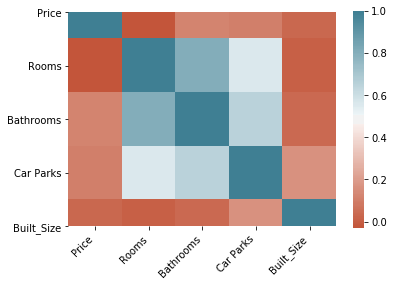

In [48]:
corr = df.corr()
ax = sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
# print(corr)

In [49]:
# df.loc[df['Rooms'].isnull()]
# df['Rooms'].value_counts(dropna=False)
# df.query('Rooms != Rooms')
# x = df.groupby("Rooms")["Built_Size"].count()
x_bigs = df[df.Rooms < 11]
x_bigs_1 = x_bigs.groupby("Rooms")["Built_Size"].median()
print(x_bigs_1.sort_values())
# x_bigs['Built_Size'].value_counts(dropna=False)

Rooms
1.0      707.0
2.0      926.0
3.0     1100.0
4.0     1638.0
5.0     3660.0
6.0     5448.0
7.0     6700.0
9.0     7700.0
0.0     8500.0
10.0    9240.0
8.0     9705.0
Name: Built_Size, dtype: float64


In [50]:
dt

NameError: name 'dt' is not defined

In [0]:
non-cateagorical values

In [0]:
# impute the catagorical values e.g. Furnishing

df['Furnishing'] = df['Furnishing'].fillna('Unknown')

In [0]:
# check for null values
df.isnull().sum()

In [0]:
# Export the imputed file into a new csv
df.to_csv('./kl_property_data_imputed.csv')

In [0]:
# read the new data file
dfi = pd.read_csv('./kl_property_data_imputed.csv')
dfi.head()

In [0]:
df.describe()

In [0]:
dfi.describe()